# Модуль №1
<b>Тема: Дослідження побудови класифікатора та регресора методом k-найближчих сусідів (k-nn)</b><br/>
<b>Студент: Чижовська Зоряна</b>

Створення KNN – класифікатора у Python

In [177]:
import pandas as pd 
import numpy as np 

# Завантажити базу параметрів квітів iris dataset 
from sklearn.datasets import load_iris
iris = load_iris()
print ('Data keys:', iris.keys())

# Перемішати записи у завантаженій базі
from sklearn.utils import shuffle
iris_data_with_target = np.append(iris.data, iris.target.reshape([iris.target.shape[0], 1]), axis=1)
np.random.shuffle(iris_data_with_target)

X = iris_data_with_target[:, 0:4]
y = iris_data_with_target[:, 4]

labels, feature_names  = iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris


Data keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,4.4,3.2,1.3,0.2,0.0,setosa
1,6.0,2.2,5.0,1.5,2.0,virginica
2,5.0,3.4,1.5,0.2,0.0,setosa
3,6.4,3.2,4.5,1.5,1.0,versicolor
4,6.9,3.2,5.7,2.3,2.0,virginica
...,...,...,...,...,...,...
145,5.6,2.5,3.9,1.1,1.0,versicolor
146,5.5,2.4,3.7,1.0,1.0,versicolor
147,5.1,3.7,1.5,0.4,0.0,setosa
148,4.7,3.2,1.6,0.2,0.0,setosa


In [178]:
# Нормалізувати параметри квітів ірису
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
X_normalized = stdScaler.fit_transform(X)

X_normalized

array([[-1.74885626e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [ 1.89829664e-01, -1.97355361e+00,  7.05920842e-01,
         3.95774101e-01],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [ 6.74501145e-01,  3.28414053e-01,  4.21733708e-01,
         3.95774101e-01],
       [ 1.28034050e+00,  3.28414053e-01,  1.10378283e+00,
         1.44883158e+00],
       [-1.73673948e-01, -5.92373012e-01,  1.94384000e-01,
         1.32509732e-01],
       [ 1.03800476e+00, -1.31979479e-01,  8.19595696e-01,
         1.44883158e+00],
       [ 5.53333275e-01,  7.88807586e-01,  1.04694540e+00,
         1.58046376e+00],
       [ 3.10997534e-01, -3.62176246e-01,  5.35408562e-01,
         2.64141916e-01],
       [-2.94841818e-01, -3.62176246e-01, -8.98031345e-02,
         1.32509732e-01],
       [-1.26418478e+00, -1.31979479e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-5.25060772e-02, -8.22569778e-01,  7.62758269e-01,
      

In [179]:
# Розділити існуючі записи на навчальну і тестові вибірки
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(f'X Train shape {X_train.shape}')
print(f'X Test shape {X_test.shape}')


X Train shape (105, 4)
X Test shape (45, 4)


In [180]:
# KNN-класифікатор з заданим значенням
from sklearn.neighbors import KNeighborsClassifier # sklearn 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9555555555555556

In [191]:
# Навчити KNN-класифікатор з різними значеннями K
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_best = 0
score_best = float(0)
k_max_value = 30 # оберемо найкраще значення K у діапазоні від 1 до 30

for K in range(1, k_max_value + 1): 
    knn = KNeighborsClassifier(K) 
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)

    curr_K_accuracy = float(metrics.accuracy_score(y_test, y_pred))
    if curr_K_accuracy > score_best:
        k_best = K
        score_best = curr_K_accuracy
        

    print(f"Значення K є {K} і точність для нього рівна = {curr_K_accuracy}")
    
print (' ')
# Вибрати величину K для найкращих показників якості класифікацій у тестовій вибірці
print ('The best k = {} , score = {}'.format(k_best,score_best ))

Значення K є 1 і точність для нього рівна = 0.9555555555555556
Значення K є 2 і точність для нього рівна = 0.9777777777777777
Значення K є 3 і точність для нього рівна = 0.9555555555555556
Значення K є 4 і точність для нього рівна = 0.9333333333333333
Значення K є 5 і точність для нього рівна = 0.9555555555555556
Значення K є 6 і точність для нього рівна = 0.9777777777777777
Значення K є 7 і точність для нього рівна = 0.9777777777777777
Значення K є 8 і точність для нього рівна = 1.0
Значення K є 9 і точність для нього рівна = 0.9777777777777777
Значення K є 10 і точність для нього рівна = 0.9777777777777777
Значення K є 11 і точність для нього рівна = 0.9777777777777777
Значення K є 12 і точність для нього рівна = 0.9777777777777777
Значення K є 13 і точність для нього рівна = 0.9777777777777777
Значення K є 14 і точність для нього рівна = 0.9777777777777777
Значення K є 15 і точність для нього рівна = 0.9777777777777777
Значення K є 16 і точність для нього рівна = 0.9777777777777777


Створення KNN – регресора у Python

<IPython.core.display.Javascript object>


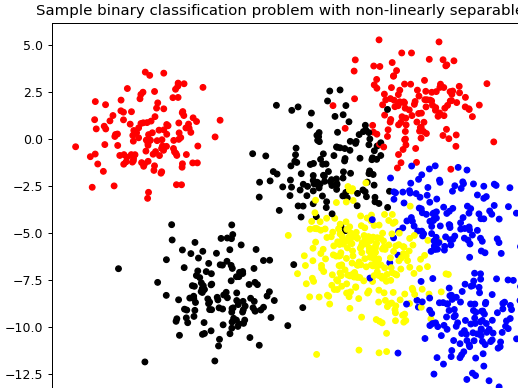

In [211]:
# Згенерувати випадковий набір даних в діапазоні 1000 значень

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','yellow','black','red'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 1000, n_features = 4, centers = 8, cluster_std = 1.5, random_state = 10)
y_D2 = y_D2 % 4

plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, marker= 'o', s=20, cmap=cmap_bold)

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

In [213]:
# Нормалізувати значення.
from sklearn.neighbors import KNeighborsRegressor # sklearn 

n_neighbors = 5

from sklearn.preprocessing import MinMaxScaler # sklearn 
scaler= MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_reg = KNeighborsRegressor(n_neighbors = n_neighbors).fit(X_train_scaled, y_train)
knn_reg.score(X_test_scaled, y_test)  # R2 score

0.9893854748603352

In [214]:
# Розділити існуючі записи на навчальну і тестові вибірки

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train, train_size=0.7, test_size=0.3)

print ('X_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)


X_train.shape=  (525, 4)
y_train.shape=  (525,)


In [236]:
# Навчити KNN-регресор з різними значеннями K
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_best_2 = 0
score_best_2 = float(0)
k_max_value = 30 # оберемо найкраще значення K у діапазоні від 1 до 30

for K in range(1, k_max_value + 1): 
    knn_r = KNeighborsRegressor(K) 
    knn_r.fit(X_train, y_train) 

    y_pred = knn_r.predict(X_test)

    curr_K = mean_squared_error(y_test, y_pred)
    score = knn_r.score(X_test, y_test)
    
    if score >  score_best_2 :
        k_best_2 = K
        score_best_2 = score

    print(f"Значення K є {K} і score = {score}")
    
    

print (' ')
# Вибрати величину K для найкращих показників якості класифікацій у тестовій вибірці
print(f"Найкраще Значення K є {k_best} і його точність {curr_K}, score {score_best_2}")


Значення K є 1 і score = 0.8968464485705865
Значення K є 2 і score = 0.9244768641320366
Значення K є 3 і score = 0.935324360611717
Значення K є 4 і score = 0.9359895372826407
Значення K є 5 і score = 0.9512231063955202
Значення K є 6 і score = 0.9568146838261781
Значення K є 7 і score = 0.9603024233566105
Значення K є 8 і score = 0.956079151930445
Значення K є 9 і score = 0.9589750866890075
Значення K є 10 і score = 0.9636015325670498
Значення K є 11 і score = 0.9647426763414224
Значення K є 12 і score = 0.964592134132364
Значення K є 13 і score = 0.9614373135083194
Значення K є 14 і score = 0.9621068586585828
Значення K є 15 і score = 0.9621770311425484
Значення K є 16 і score = 0.962957974137931
Значення K є 17 і score = 0.9667415205537148
Значення K є 18 і score = 0.9670481710711596
Значення K є 19 і score = 0.9676497073574158
Значення K є 20 і score = 0.9692473474801061
Значення K є 21 і score = 0.9676538264387197
Значення K є 22 і score = 0.9680157007743214
Значення K є 23 і score

<IPython.core.display.Javascript object>


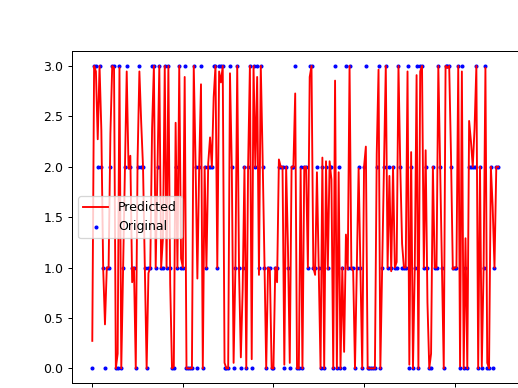

In [230]:
# Здійснити візуалізації отриманих рішень
# Графік схожості передбачених та справжніх даних у наборі

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(range(len(y_test)), y_test, s=5, color="blue", label='Original')
plt.plot(range(len(y_pred)), y_pred, lw=1.5, color="red", label='Predicted')
plt.legend()
plt.show()